# Introduction
Integrate the data from actor and actress

## Imports

In [66]:
# Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import ast


# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [68]:
#import pandas as pd
df_X = pd.read_csv('export_df_X_forML.csv')
df_y = pd.read_csv('export_df_y_forML.csv')
df_X_M = pd.read_csv('export_df_X_M_forML.csv')
df_y_M = pd.read_csv('export_df_y_M_forML.csv')
df_X_F = pd.read_csv('export_df_X_F_forML.csv')
df_y_F = pd.read_csv('export_df_y_F_forML.csv')
df_X_num = pd.read_csv('export_df_X_num_forML.csv')


df_X = df_X.drop(["Unnamed: 0"], axis = 1)
df_y = df_y.drop(["Unnamed: 0"], axis = 1)
df_X_M = df_X_M.drop(["Unnamed: 0"], axis = 1)
df_y_M = df_y_M.drop(["Unnamed: 0"], axis = 1)
df_X_F = df_X_F.drop(["Unnamed: 0"], axis = 1)
df_y_F = df_y_F.drop(["Unnamed: 0"], axis = 1)
df_X_num = df_X_num.drop(["Unnamed: 0"], axis = 1)

In [70]:
df_X_num.columns

Index(['age', 'age_diff', 'zodiac', 'zodiac_sp', 'num_of_child_cl',
       'num_of_child_sp_cl', 'num_of_role', 'num_of_role_sp', 'geo_distance',
       'age_m_1', 'age_m_sp_1', 'sex'],
      dtype='object')

In [72]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age','age_diff', 'zodiac','zodiac_sp','num_of_child_cl',
                         'num_of_child_sp_cl','num_of_role','num_of_role_sp','geo_distance',
                         'age_m_1','age_m_sp_1', 'sex']

df_X_minmax_transform = df_X_num#pd.DataFrame(data = features_log_transformed)
df_X_minmax_transform[numerical] = scaler.fit_transform(df_X_num[numerical])

# Show an example of a record with scaling applied
display(df_X_minmax_transform.head(n = 5))

,age,age_diff,zodiac,zodiac_sp,num_of_child_cl,num_of_child_sp_cl,num_of_role,num_of_role_sp,geo_distance,age_m_1,age_m_sp_1,sex
0,0.262917,0.509026,0.545455,0.517139,0.111111,0.177773,0.4,0.151194,0.603319,0.088608,0.283338,1.0
1,0.306983,0.465491,0.636364,0.818182,0.111111,0.142857,0.0,0.000000,1.000000,0.202532,0.229167,1.0
2,0.348209,0.509026,0.507566,0.517139,0.111111,0.177773,0.2,0.151194,0.603319,0.228556,0.283338,1.0
3,0.348209,0.509026,0.507566,0.517139,0.145562,0.177773,0.0,0.151194,0.603319,0.228556,0.283338,1.0
4,0.060952,0.509026,0.909091,0.517139,0.145562,0.177773,0.2,0.151194,0.603319,0.177215,0.283338,1.0


split data

In [73]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X_minmax_transform, 
                                                    df_y, 
                                                    test_size = 0.2, 
                                                    random_state = 12)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2472 samples.
Testing set has 618 samples.


### Logistic regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(0, 10, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create logistic regression
lr_model = LogisticRegression(random_state=0) # Instantiate

# Create grid search using 5-fold cross validation
clf = GridSearchCV(lr_model, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_rl_model = clf.fit(X_train, y_train) #Fit

#Predict and score the model
y_test_preds_rl = best_rl_model.predict(X_test) 

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(best_rl_model.score(X_test, y_test)))
# View best hyperparameters
print('Best Penalty:', best_rl_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_rl_model.best_estimator_.get_params()['C'])
print('Best Model:', best_rl_model.best_estimator_)

Accuracy of logistic regression classifier on test set: 0.70
Best Penalty: l2
Best C: 12.91549665014884
Best Model: LogisticRegression(C=12.91549665014884, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [78]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, y_test_preds_rl)
print(confusion_matrix)

[[183  92]
 [ 91 252]]


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_preds_rl))

              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       275
         1.0       0.73      0.73      0.73       343

   micro avg       0.70      0.70      0.70       618
   macro avg       0.70      0.70      0.70       618
weighted avg       0.70      0.70      0.70       618



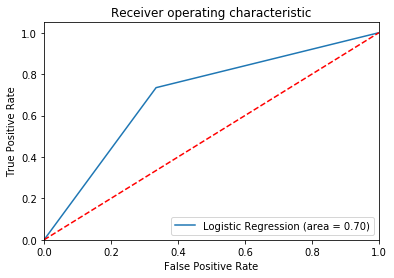

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, best_rl_model.predict(X_test) )
fpr, tpr, thresholds = roc_curve(y_test, best_rl_model.predict(X_test))

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 3)]
# Number of features to consider at every split
max_features = ['auto']#, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 4]
# Method of selecting samples for training each tree
bootstrap = [True]#, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)
#{'n_estimators': 200, 'min_samples_split': 5, 
# 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}

# Create regularization hyperparameter space
#max_depth= np.linspace(0, 0.1, 1, 2, 5)
#n_estimators = np.linspace(20,50,100,200)
# Create hyperparameter options
#hyperparameters = dict(max_depth=max_depth, n_estimators = n_estimators )

#rf_model = RandomForestRegressor(n_estimators=200, random_state=0)  
#best_rf_model = rf_model.fit(X_train, y_train)  
#y_test_pred_rf = best_rf_model.predict(X_test)  

{'n_estimators': [100, 200, 300], 'max_features': ['auto'], 'max_depth': [10, 32, 55, 77, 100, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 4], 'bootstrap': [True]}


#### Random search training
we instantiate the random search and fit it like any Scikit-Learn model:

In [82]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_model = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)

In [264]:
print('Best Parameters:', rf_random.best_params_)
print('Best Model:', rf_random.best_estimator_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}
Best Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 4, 
                           max_features= 'auto', max_depth= 10, bootstrap= True)


rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
from sklearn.metrics import accuracy_score
y_test_pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred_rf)

print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy))

Accuracy of random forest classifier on test set: 0.70


In [85]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix)

[[106 169]
 [ 40 303]]


In [96]:
# feature importance

importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=df_X_num.columns, columns=["Importance"])

#importance["Std"] = np.std([tree.feature_importances_
#                            for tree in rf.estimators_], axis=0)

#x = range(importance.shape[0])
#y = importance.ix[:, 0]
#yerr = importance.ix[:, 1]

#plt.bar(x, y, yerr=yerr, align="center")
#plt.bar(x, y, align="center")
#plt.show()

In [97]:
importance1 = importance.sort_values(by = 'Importance', ascending=False).head(12) #.sort_values(by='col1', ascending=False)
#importance.head()

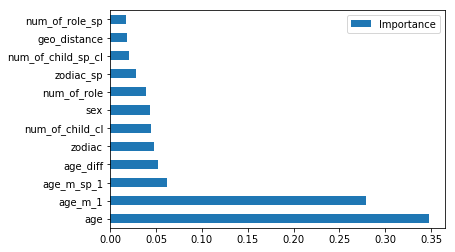

In [98]:
importance1.plot(kind='barh')

KeyError: 'importance'

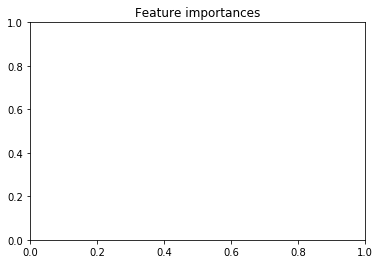

In [47]:
plt.figure()
indices = np.argsort(importance)
plt.title("Feature importances")
plt.barh(range(df_X.shape[1]), importance['importance'][indices],
       color="r", xerr=importance["Std"][indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(df_X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')


Evaluation of random search

In [227]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_test_pred_rf.round()))  
print(classification_report(y_test,y_test_pred_rf.round()))  
print(accuracy_score(y_test, y_test_pred_rf.round()))  

[[181  94]
 [ 95 248]]
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66       275
         1.0       0.73      0.72      0.72       343

   micro avg       0.69      0.69      0.69       618
   macro avg       0.69      0.69      0.69       618
weighted avg       0.69      0.69      0.69       618

0.6941747572815534


In [228]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) 

Mean Absolute Error: 0.3473516720604099
Mean Squared Error: 0.21816452714850773
Root Mean Squared Error: 0.4670808571848216


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(df_X, df_y) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.49928322392663327 on 618 values.'

**2.** Divorce rate

In [67]:
# calculate the divorce rate
a = (df[df['divorce']==1]['divorce'].sum())/(df['divorce'].notnull().sum())*100

"overall divorce rate = {0:8.2f} %".format(a)# 

'overall divorce rate =    53.95 %'

In [68]:
a = df[(df['sex']=='M') & (df['divorce']==1)]['divorce'].sum()/(df[df['sex']=='M']['divorce'].notnull().sum())*100
"overall divorce rate for male = {0:8.2f} %".format(a)# 

'overall divorce rate for male =    49.55 %'

In [69]:
a = df[(df['sex']=='F') & (df['divorce']==1)]['divorce'].sum()/(df[df['sex']=='F']['divorce'].notnull().sum())*100
"overall divorce rate for female = {0:8.2f} %".format(a)# 

'overall divorce rate for female =    62.11 %'

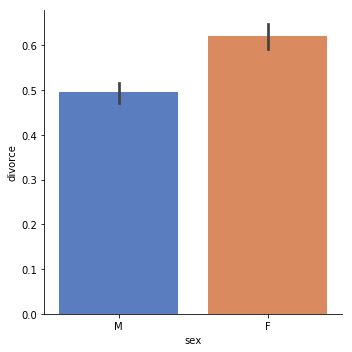

In [70]:
# Set up a factorplot
g = sns.factorplot("sex", "divorce", data=df, kind="bar", palette="muted", legend=False)
                   
# Show plot
plt.show()

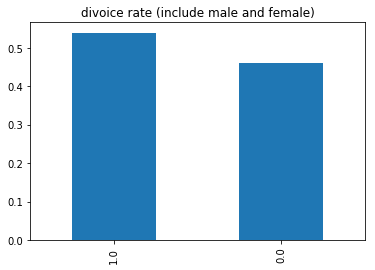

In [71]:
# calculate the divorce rate
(df['divorce'].value_counts()/df['divorce'].notnull().sum()).plot(kind="bar")
plt.title("divoice rate (include male and female)");

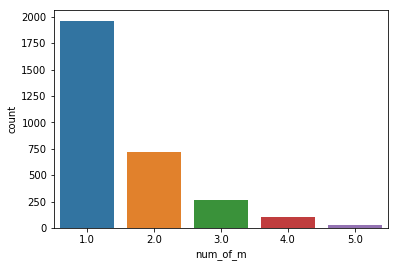

In [101]:
ax = sns.countplot(x="num_of_m", data=df)

In [73]:
df.columns

Index(['name', 'bday', 'name_sp', 'num_of_child', 'education', 'role',
       'birthplace', 'bday_sp', 'birthplace_sp', 'role_sp', 'name_sp_sp',
       'num_of_child_sp', 'age_diff', 'age', 'age_spouse', 'name_sp_cl',
       'year_m', 'year_div', 'name_sp_sp_cl', 'year_m_sp', 'year_div_sp',
       'num_of_child_cl', 'num_of_child_sp_cl', 'name_sp_cl.1', 'num_of_m',
       'name_sp_sp_cl.1', 'num_of_m_sp', 'num_of_role', 'num_of_role_sp',
       'geohash', 'geohash_sp', 'geo_distance', 'zodiac', 'zodiac_sp', 'sex',
       'divorce', 'year_m_1', 'year_div_1', 'year_m_sp_1', 'year_div_sp_1',
       'age_m_1', 'age_div_1', 'age_m_sp_1', 'age_div_sp_1'],
      dtype='object')

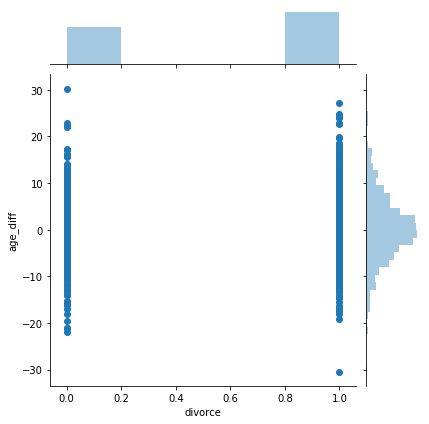

In [80]:
#sns.distplot('age', data = df)
sns.jointplot(x='divorce', y='age_diff', data=df);

In [109]:
df_year = df[['name','year_m', 'year_div']]

In [121]:
df_year = df_year.dropna()
df_year = df_year.reset_index()

In [126]:
print(df_year.shape)
df_year.head(10)

(1364, 4)


,index,name,year_m,year_div
0,1,Bruce Abbott,"[1982, 1994]",[1989]
1,9,Don Adams,"[1947, 1960, 1977]","[1960, 1976, 1990]"
2,11,Nick Adams,[1959],[1965]
3,16,Paul Adelstein,[2006],[2017]
4,17,Luther Adler,"[1938, 1959]",[1946]
5,18,Matt Adler,"[1993, 2000]",[1995]
6,20,Ben Affleck,[2005],[2018]
7,21,Casey Affleck,[2006],[2017]
8,22,John Agar,"[1945, 1951]",[1950]
9,23,Charles Aidman,"[1957, 1969]",[1967]


In [156]:
num_year_m = []
num_year_div = []
for i in range(len(df_year)):
    try:
        num_year_m.append(len(ast.literal_eval(df_year['year_m'][i])))
        num_year_div.append(len(ast.literal_eval(df_year['year_div'][i])))
    except:
        num_year_m.append(np.nan)
        num_year_div.append(np.nan)

In [158]:
df_num_year_m = pd.DataFrame({'num_year_m':num_year_m, 'num_year_div':num_year_div})

In [160]:
df_year = pd.concat([df_year, df_num_year_m], axis =1)

In [163]:
df_year['mar_stage'] = df_year['num_year_m']  - df_year['num_year_div']

In [170]:
df_year.sort_values(by=['mar_stage'], ascending=False).head()
#print(df_year['mar_stage'].max())

,index,name,year_m,year_div,num_year_m,num_year_div,mar_stage
955,2343,Sharon Farrell,"[1962, 1965, 1969, 1973, 1974]",[1962],5,1,4
638,1681,George Segal,"[1956, 1983, 1996]",[1983],3,1,2
723,1904,Clint Walker,"[1948, 1974, 1997]",[1968],3,1,2
71,173,Milton Berle,"[1941, 1949, 1953, 1991]","[1947, 1950]",4,2,2
1208,2807,Suzanne Pleshette,"[1964, 1968, 2001]",[1964],3,1,2


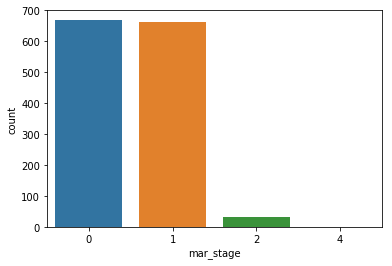

In [172]:
ax = sns.countplot(x="mar_stage", data=df_year)

In [185]:
ast.literal_eval(df_year['year_div'][0])#[0]

[1989]

In [196]:
year_m_1 = []
year_div_1 = []
year_diff_1 = []
for i in range(len(df_year)):
    try:
        a = ast.literal_eval(df_year['year_m'][i])[0]
        year_m_1.append(a)
        b = ast.literal_eval(df_year['year_div'][i])[0]
        year_div_1.append(b)
        year_diff_1.append(b-a)
    except:
        year_m_1.append(np.nan)
        year_div_1.append(np.nan)
        year_diff_1.append(np.nan)
        

In [202]:
df_year_m_div_1 = pd.DataFrame({'year_m_1':year_m_1, 'year_div_1':year_div_1,'year_diff_1':year_diff_1 })
df_year = pd.concat([df_year, df_year_m_div_1], axis =1)

In [203]:
df_year.head()

,index,name,year_m,year_div,num_year_m,num_year_div,mar_stage,year_m_1,year_div_1,year_diff_1
0,1,Bruce Abbott,"[1982, 1994]",[1989],2,1,1,1982,1989,7
1,9,Don Adams,"[1947, 1960, 1977]","[1960, 1976, 1990]",3,3,0,1947,1960,13
2,11,Nick Adams,[1959],[1965],1,1,0,1959,1965,6
3,16,Paul Adelstein,[2006],[2017],1,1,0,2006,2017,11
4,17,Luther Adler,"[1938, 1959]",[1946],2,1,1,1938,1946,8


remove the row with year_diff_1<0

In [211]:
df_year = df_year[df_year['year_diff_1']>=0].sort_values(by=['year_diff_1'], ascending=True);

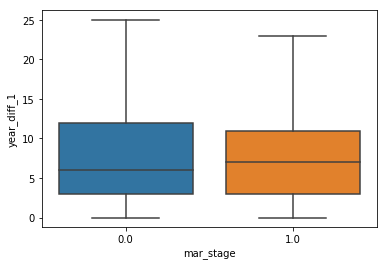

In [263]:
sns.boxplot(x ="mar_stage", y="year_diff_1",
           # hue="mar_stage", palette=["m", "g"],
            data=df_year[df_year['mar_stage']<=1], showfliers=False)

In [244]:
year_m_2 = []
year_div_1 = []
year_diff_2 = []
for i in range(len(df_year)):
    try:
        a = ast.literal_eval(df_year['year_m'][i])[1]
        year_m_2.append(a)        
        b = ast.literal_eval(df_year['year_div'][i])[0]
        year_div_1.append(b)
        year_diff_2.append(a-b)
    except:
        year_m_2.append(np.nan)
        year_div_1.append(np.nan)
        year_diff_2.append(np.nan)

In [237]:
df_year  = df_year.drop(['year_m_2','year_diff_2'], axis =1)

In [245]:
df_year_m_div_2 = pd.DataFrame({'year_m_2':year_m_2, 'year_diff_2':year_diff_2 })
df_year = pd.concat([df_year, df_year_m_div_2], axis =1)

In [254]:
#df_year.sort_values(by=['year_diff_2'], ascending=True).head(20)
df_year_2 = df_year[df_year['year_diff_2']>=0]

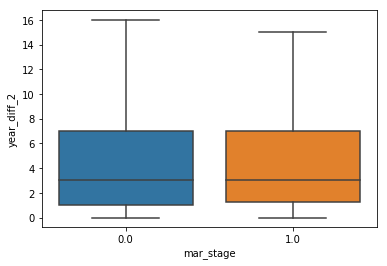

In [262]:
sns.boxplot(x ="mar_stage", y="year_diff_2",
           # hue="mar_stage", palette=["m", "g"],
            data=df_year_2[df_year_2['mar_stage']<=1], showfliers=False)

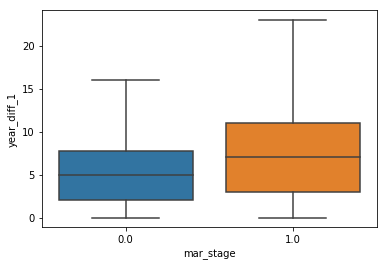

In [261]:
sns.boxplot(x ="mar_stage", y="year_diff_1",
           # hue="mar_stage", palette=["m", "g"],
            data=df_year_2[df_year_2['mar_stage']<=1], showfliers=False)

# Conclusions and Next Steps
Summarize findings here

In [ ]:
import pandas as pd
df = pd.read_csv('export_df_actress.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import test3 as t
import seaborn as sns
%matplotlib inline


In [ ]:
fill_mean = lambda col: col.fillna(col.mean())
fill_df = drop_sal_df.apply(fill_mean, axis = 0) #Fill all missing values with the mean of the column.


In [ ]:
#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

In [ ]:
pd.get_dummies(dummy_var_df['col1'])